In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()*100/df.shape[0]

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [ ]:
df['smoker_data'] = df['smoker'].replace({'no':0, 'yes':1})
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_data
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

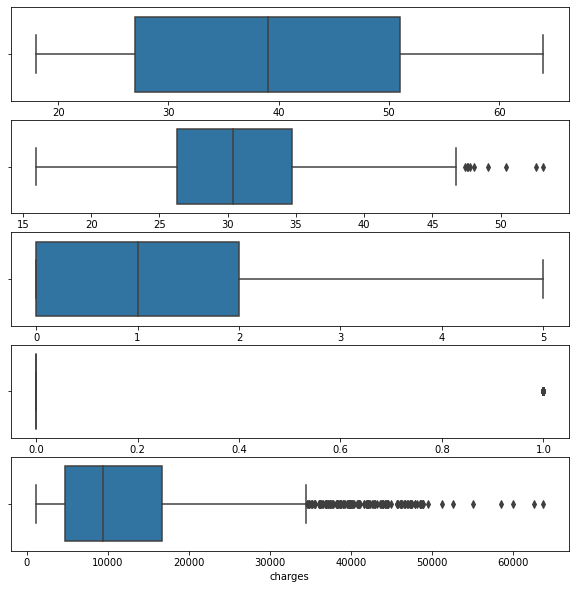

In [ ]:
fig, axs = plt.subplots(5, figsize = (10,10))
plt1 = sns.boxplot(df['age'], ax = axs[0])
plt2 = sns.boxplot(df['bmi'], ax = axs[1])
plt3 = sns.boxplot(df['children'], ax = axs[2])
plt4 = sns.boxplot(df['smoker_data'], ax = axs[3])
plt5 = sns.boxplot(df['charges'], ax = axs[4])

In [ ]:
df.corr()

,age,bmi,children,charges,smoker_data
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoker_data,-0.025019,0.003750,0.007673,0.787251,1.000000


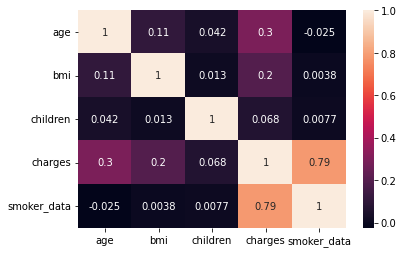

In [ ]:
sns.heatmap(df.corr(),annot = True)

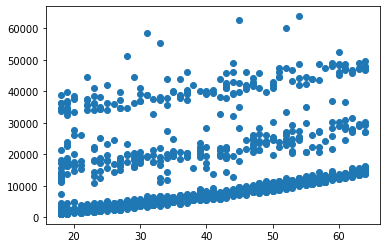

In [ ]:
plt.scatter(df['age'],df['charges'])

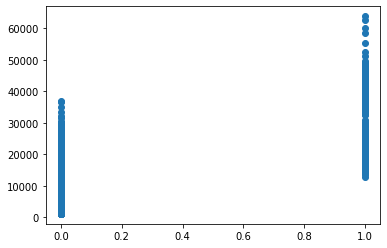

In [ ]:
plt.scatter(df['smoker_data'], df['charges'])

In [ ]:
x=df[['age','smoker_data']]
y=df['charges']
print("x ->",x.shape)
print("y ->",y.shape)

x -> (1338, 2)
y -> (1338,)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10) 
print("x train->",xtrain.shape)
print("x test->",xtest.shape)

x train-> (936, 2)
x test-> (402, 2)


In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
reg.predict(xtest)

array([ 7797.60331762,  7505.39430596, 14226.20157396, 14810.61959726,
        5459.9312244 ,  8966.43936422, 10135.27541083, 27097.15440538,
        9843.06639918, 33817.96167337,  3122.25913119,  4583.30418945,
        9550.85738753,  8966.43936422, 11011.90244579, 14518.41058561,
        4291.09517779, 15395.03762057, 13349.574539  , 31772.49859181,
       34110.17068503,  2537.84110788,  2245.63209623,  8089.81232927,
        5167.72221275, 14226.20157396,  9843.06639918, 12765.1565157 ,
        4583.30418945, 32649.12562677,  2537.84110788, 32649.12562677,
       10135.27541083,  9843.06639918,  5459.9312244 ,  7213.18529431,
       15102.82860891, 12180.73849239, 11596.32046909,  9843.06639918,
       15395.03762057, 11596.32046909,  7505.39430596,  9843.06639918,
        2245.63209623,  9258.64837588, 10719.69343414, 33233.54365007,
       14226.20157396, 13349.574539  , 27973.78144034,  5167.72221275,
       10135.27541083, 13933.99256231, 12472.94750405, 14810.61959726,
      

In [ ]:
comparision=pd.DataFrame({"predicted":reg.predict(xtest),'Actual':ytest}) 
comparision['error']=comparision['predicted']-comparision['Actual']
comparision

,predicted,Actual,error
7,7797.603318,7281.50560,516.097718
999,7505.394306,5267.81815,2237.576156
1209,14226.201574,12347.17200,1879.029574
491,14810.619597,24513.09126,-9702.471663
625,5459.931224,3736.46470,1723.466524
...,...,...,...
854,35571.215743,24106.91255,11464.303193
554,4291.095178,17878.90068,-13587.805502
1278,32649.125627,22462.04375,10187.081877
374,2830.050120,1391.52870,1438.521420


In [ ]:
reg.score(xtest,ytest)

0.6911260898702956

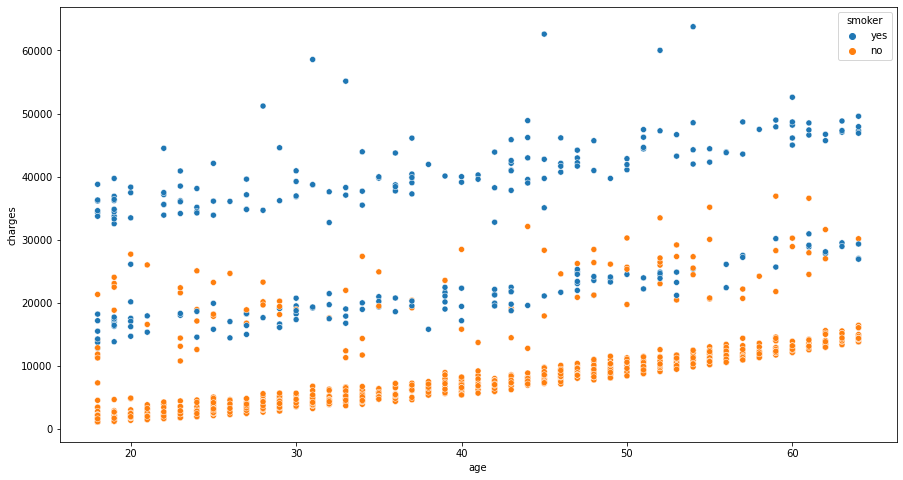

In [ ]:
plt.figure(figsize = (15,8))
sc_plot = sns.scatterplot (data = df,x = 'age', y = 'charges', hue = 'smoker')


In [ ]:
non_smoker_data = df[df.smoker == "no"]
non_smoker_data


,age,sex,bmi,children,smoker,region,charges,smoker_data
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
5,31,female,25.740,0,no,southeast,3756.62160,0
...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0


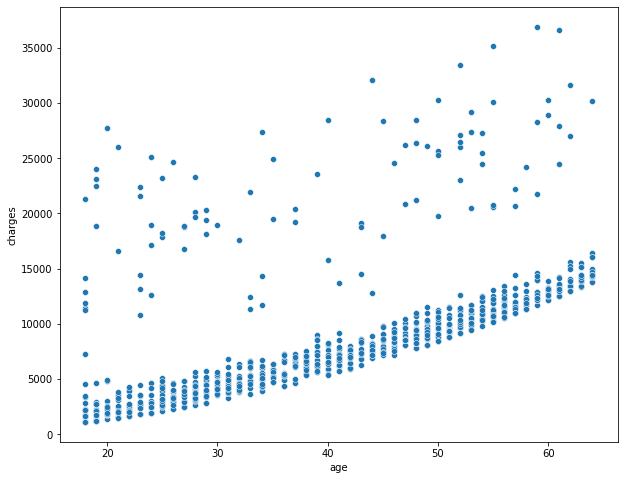

In [ ]:
plt.figure(figsize = (10,8))
plot = sns.scatterplot (data = non_smoker_data,x = 'age', y = 'charges')

In [ ]:
from sklearn.linear_model import LinearRegression
regg = LinearRegression()

In [ ]:
x1 = non_smoker_data[['age']]
x1

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [ ]:
y1 = non_smoker_data['charges']
y1

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
regg.fit(x1,y1)

LinearRegression()

In [ ]:
regg.predict(np.array([[20],[25],[30]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3253.55770006, 4589.80226421, 5926.04682837])

In [ ]:
predictions = regg.predict(x1)

In [ ]:
compare =pd.DataFrame({"predicted":regg.predict(x1),'Actual':y1}) 
compare['error']=compare['predicted']-compare['Actual']
compare

,predicted,Actual,error
1,2719.059874,1725.55230,993.507574
2,5391.549003,4449.46200,942.087003
3,6727.793567,21984.47061,-15256.677043
4,6460.544654,3866.85520,2593.689454
5,6193.295741,3756.62160,2436.674141
...,...,...,...
1332,11805.522911,11411.68500,393.837911
1333,11271.025085,10600.54830,670.476785
1334,2719.059874,2205.98080,513.079074
1335,2719.059874,1629.83350,1089.226374


In [ ]:
regg.score(x1,y1)

0.3943171632425906